#### k-최근접 이웃의 한계
k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균하여 예측 -> 훈련 세트 범위 밖의 샘플은 예측 불가

💠 해결법
1) 훈련 세트 범위 밖의 샘플이 포함되도록 훈련 세트를 다시 만들기
2) 다른 알고리즘 사용 ex) 선형 회귀

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 특성 데이터는 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 최근접 이웃 개수를 3으로 하는 k-최근접 이웃 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


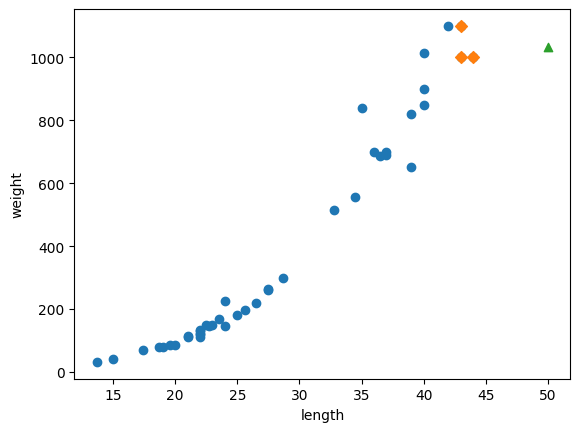

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) # 50cm 농어의 이웃 구하기

plt.scatter(train_input, train_target) # 훈련 세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 이웃 샘플
plt.scatter(50, 1033, marker='^') # 50cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(np.mean(train_target[indexes])) # 이웃 샘플의 타깃의 평균

1033.3333333333333


In [ ]:
print(knr.predict([[100]])) # 길이가 100cm인 농어도 여전히 1,033g으로 예측

[1033.33333333]


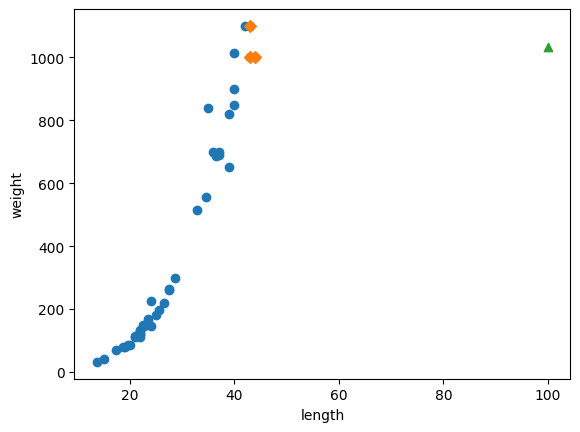

In [ ]:
distances, indexes = knr.kneighbors([[100]]) # 100cm 농어의 이웃 구하기

plt.scatter(train_input, train_target) # 훈련 세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 이웃 샘플
plt.scatter(100, 1033, marker='^') # 100cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 선형 회귀
*   최적의 직선 찾기
*   특성이 하나인 경우
*   특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 학습하는 알고리즘

->  문제 해결 : k-최근접
이웃 회귀와 다르게 훈련 세트를 벗어난 범위의 데이터도 잘 예측

-> new 문제 : 모델이 단순하여
농어의 무게가 음수일 수도 있음! -> 다항 회귀로 해결

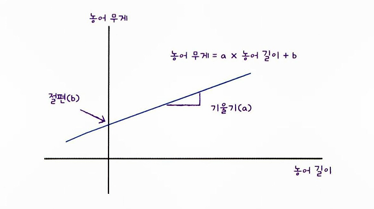

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 객체 생성
lr.fit(train_input, train_target) # 선형 회귀 모델 훈련
print(lr.predict([[50]])) # 50cm 농어에 대한 예측

[1241.83860323]


In [ ]:
# 모델 파라미터 :  머신러닝 알고리즘이 찾은 값
# y = a * x + b , lr.coef_ = a, lr.intercept_ = b
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


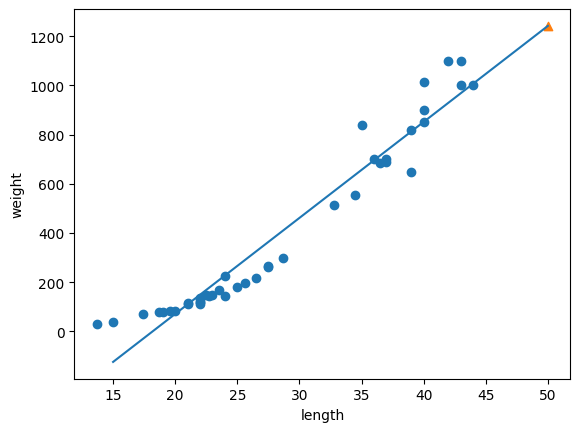

In [ ]:
plt.scatter(train_input, train_target) # 훈련 세트의 산점도
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) # 15에서 50까지 1차 방정식 그래프
plt.scatter(50, 1241.8, marker='^') # 50cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target)) # 훈련 세트 점수
print(lr.score(test_input, test_target)) # 테스트 세트 점수


# 훈련 세트, 테스트 세트 점수 낮음 -> 과소적합

0.939846333997604
0.8247503123313558


#### 다항 회귀
*   최적의 곡선 찾기
*   다항식을 사용한 선형 회귀

🦊 선형 회귀의 선형은 입력과 타깃 사이의 관계가 아니라 가중치(계수)와 타깃 사이의 관계를 의미 -> 길이를 제곱하더라도 여전히 선형 회귀

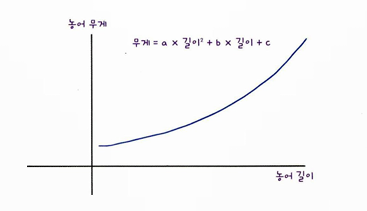

In [ ]:
# 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
# 데이터셋의 크기 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]])) #  50cm 농어 무게 예측

[1573.98423528]


In [ ]:
# 이 모델이 훈련한 계수와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


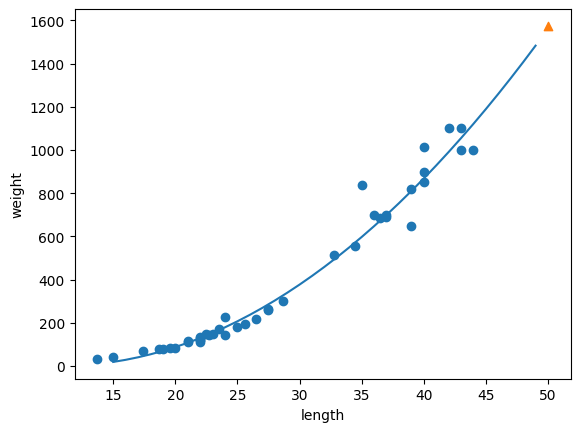

In [ ]:
point = np.arange(15, 50) # 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성 -> 짧은 직선을 이어서 그리면 곡선처럼 표현 가능
plt.scatter(train_input, train_target) # 훈련 세트의 산점도
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) # 15에서 49까지 2차 방정식 그래프
plt.scatter(50, 1574, marker='^') # 50cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target)) # 훈련 세트 점수
print(lr.score(test_poly, test_target)) # 테스트 세트 점수

# 점수가 이전보다 높아졌으나 여전히 테스트 세트의 점수가 조금 더 높음 -> 과소적합 -> 더 복잡한 모델 필요

0.9706807451768623
0.9775935108325122
